## 평가지표

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score , recall_score, accuracy_score, f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-10-15 06:01:40--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-10-15 06:01:40--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-10-15 06:01:40--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

In [11]:
x = np.load('fruits_300.npy')
x = x.reshape(-1,100*100) # train_test_split 실행 시 데이터의 최대 차원은 2차원이기 때문
y = [0]*100 + [1]*100 + [2]*100

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(xtrain, ytrain)
pred = knn.predict(xtest)

In [12]:
print('혼동행렬')
print(confusion_matrix(ytest, pred))

accuracy = accuracy_score(ytest, pred)
precision = precision_score(ytest, pred, average = 'macro')
recall = recall_score(ytest, pred, average = 'macro')
f1 = f1_score(ytest, pred, average = 'macro')

print('')
print('정확도 : ', accuracy)
print('정밀도 : ', precision)
print('재현율 : ', recall)
print('F1-score : ', f1)

혼동행렬
[[21  0  0]
 [ 0 19  0]
 [ 0  1 19]]

정확도 :  0.9833333333333333
정밀도 :  0.9833333333333334
재현율 :  0.9833333333333334
F1-score :  0.982905982905983


### Confusion Matrix without Normalization

<Axes: >

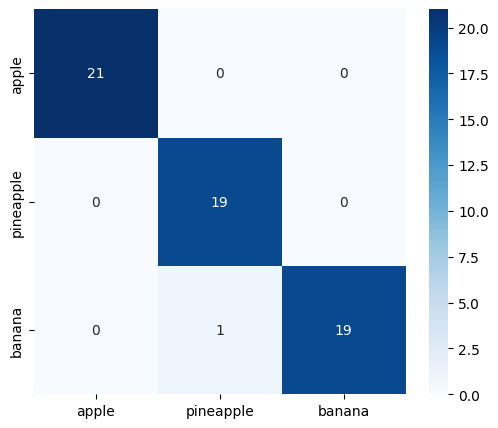

In [19]:
confusion = confusion_matrix(ytest, pred)
confusion_map = pd.DataFrame(confusion, index = ['apple','pineapple','banana'], columns = ['apple','pineapple','banana'])

plt.figure(figsize = (6,5))
sns.heatmap(confusion_map, annot = True, cmap='Blues')

### Confusion Matrix with Normalization

In [25]:
total = np.sum(confusion, axis=1) # 각 행의 값을 전부 더함
confusion = confusion / total[:, None]
confusion

array([[1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.05, 0.95]])

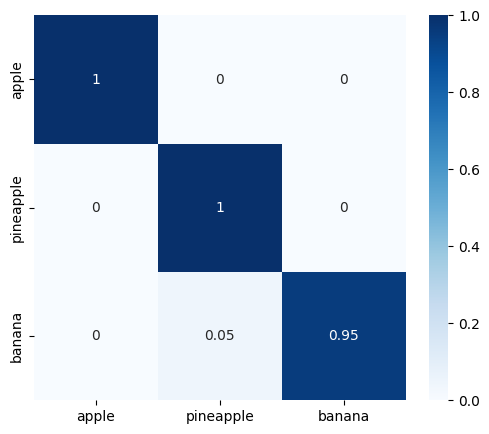

In [26]:
confusion_map_n = pd.DataFrame(confusion, index = ['apple','pineapple','banana'],
                               columns = ['apple','pineapple','banana'])
plt.figure(figsize = (6, 5))
sns.heatmap(confusion_map_n, cmap='Blues', annot = True)
plt.show()